In [36]:
import collections
import numpy as np
import matplotlib.pyplot as plt


In [37]:
def create_sorted_matrix(unsorted):
    outer_list = list()
    sim_od = collections.OrderedDict(sorted(unsorted.items()))
    for elem in sim_od.values():
        inner_list = list()
        od = collections.OrderedDict(sorted(elem.items()))
        for el in od.values():
            inner_list.append(el)
        outer_list.append(inner_list)

    return np.array(outer_list)



In [38]:
ram_sim0 = {1: {16384: 1030331, 8192: 999867, 2048: 998134, 1024: 987559, 4096: 1013415}, 
            10: {8192: 1214530, 1024: 1108393, 16384: 1354328, 4096: 1167714, 2048: 1125362},
            20: {8192: 1520346, 1024: 1284147, 16384: 1879903, 4096: 1399264, 2048: 1346790},
            50: {4096: 2059156, 16384: 3372737, 2048: 1826329, 1024: 1747049, 8192: 2945679}}
ram_avg_new = create_sorted_matrix(ram_sim0)    
print(ram_avg_new)


[[ 987559  998134 1013415  999867 1030331]
 [1108393 1125362 1167714 1214530 1354328]
 [1284147 1346790 1399264 1520346 1879903]
 [1747049 1826329 2059156 2945679 3372737]]


In [39]:
ls_sim0 = {1: {2048: 5017.6, 8192: 25292.8, 1024: 2457.6, 4096: 9011.2, 16384: 33382.4}, 
            10: {4096: 107008.0, 2048: 57241.6, 1024: 30208.0, 16384: 334438.4, 8192: 187904.0},
            20: {4096: 234598.4, 2048: 143155.2, 1024: 81305.6, 16384: 744345.6, 8192: 416563.2},
            50: {16384: 2097152.0, 8192: 1992294.4, 1024: 334745.6, 4096: 620236.8, 2048: 414515.2}
            }
ls_avg_new = create_sorted_matrix(ls_sim0)

container = np.array([60065, 60065, 60065, 60065, 60065])


In [40]:
total_migration_unbalanced = ram_avg_new + ls_avg_new + container*1024
total_migration_unbalanced

array([[62496576.6, 62509711.6, 62528986.2, 62531719.8, 62570273.4],
       [62645161. , 62689163.6, 62781282. , 62908994. , 63195326.4],
       [62872012.6, 62996505.2, 63140422.4, 63443469.2, 64130808.6],
       [63588354.6, 63747404.2, 64185952.8, 66444533.4, 66976449. ]])

In [41]:
run_migration_unbalanced = ram_avg_new + ls_avg_new
run_migration_unbalanced

array([[ 990016.6, 1003151.6, 1022426.2, 1025159.8, 1063713.4],
       [1138601. , 1182603.6, 1274722. , 1402434. , 1688766.4],
       [1365452.6, 1489945.2, 1633862.4, 1936909.2, 2624248.6],
       [2081794.6, 2240844.2, 2679392.8, 4937973.4, 5469889. ]])

In [42]:
ram_avg_new/1000

array([[ 987.559,  998.134, 1013.415,  999.867, 1030.331],
       [1108.393, 1125.362, 1167.714, 1214.53 , 1354.328],
       [1284.147, 1346.79 , 1399.264, 1520.346, 1879.903],
       [1747.049, 1826.329, 2059.156, 2945.679, 3372.737]])

In [43]:
ls_avg_new/1000

array([[   2.4576,    5.0176,    9.0112,   25.2928,   33.3824],
       [  30.208 ,   57.2416,  107.008 ,  187.904 ,  334.4384],
       [  81.3056,  143.1552,  234.5984,  416.5632,  744.3456],
       [ 334.7456,  414.5152,  620.2368, 1992.2944, 2097.152 ]])

In [44]:
def plot_stacked(subplot, val1, val2, val3, publishers, subscribers, labels, failure_percent=None, max_y=15000):
    ax = plt.subplot(2,2,subplot)
    font_size = 35
    label_size = font_size - 2
    width = 0.45
    
    x = np.arange(len(labels))
    ax.bar(x, val1/1024, width, label='Ram', color='#F2A20C', bottom=val3+val2)
    ax.bar(x, val2, width, label='Database', color='#3DBF95', bottom=val3)
    ax.bar(x, val3, width, label='Container', color='#F20707')

    plt.title('Status size with {} publishers - {} subscribers'.format(publishers, subscribers), fontsize=font_size+5)
    ax.set_xlabel("Packet size [Byte]", fontsize=font_size)
    ax.set_xticks(x) #change 0,1,2,3,4 according to label lenght
    ax.set_xticklabels(labels)
    ax.set_ylabel('KiB', fontsize=font_size)
    ax.set_ylim(0, max_y)
    ax.tick_params(axis='both', which='major', labelsize=label_size)

    if failure_percent is not None:
        axes = [ax, ax.twinx()]
        axes[-1].plot(x, failure_percent, linewidth=7.0, color='black', marker='o', markersize=15)
        axes[-1].set_xticks(x)
        axes[-1].set_ylim(1, 105)
        axes[-1].tick_params(axis='both', which='major', labelsize=label_size)
        axes[-1].set_ylabel("Packet loss %", fontsize=font_size)

    ax.legend(fontsize=font_size)
    

In [45]:
ram_avg_new

array([[ 987559,  998134, 1013415,  999867, 1030331],
       [1108393, 1125362, 1167714, 1214530, 1354328],
       [1284147, 1346790, 1399264, 1520346, 1879903],
       [1747049, 1826329, 2059156, 2945679, 3372737]])

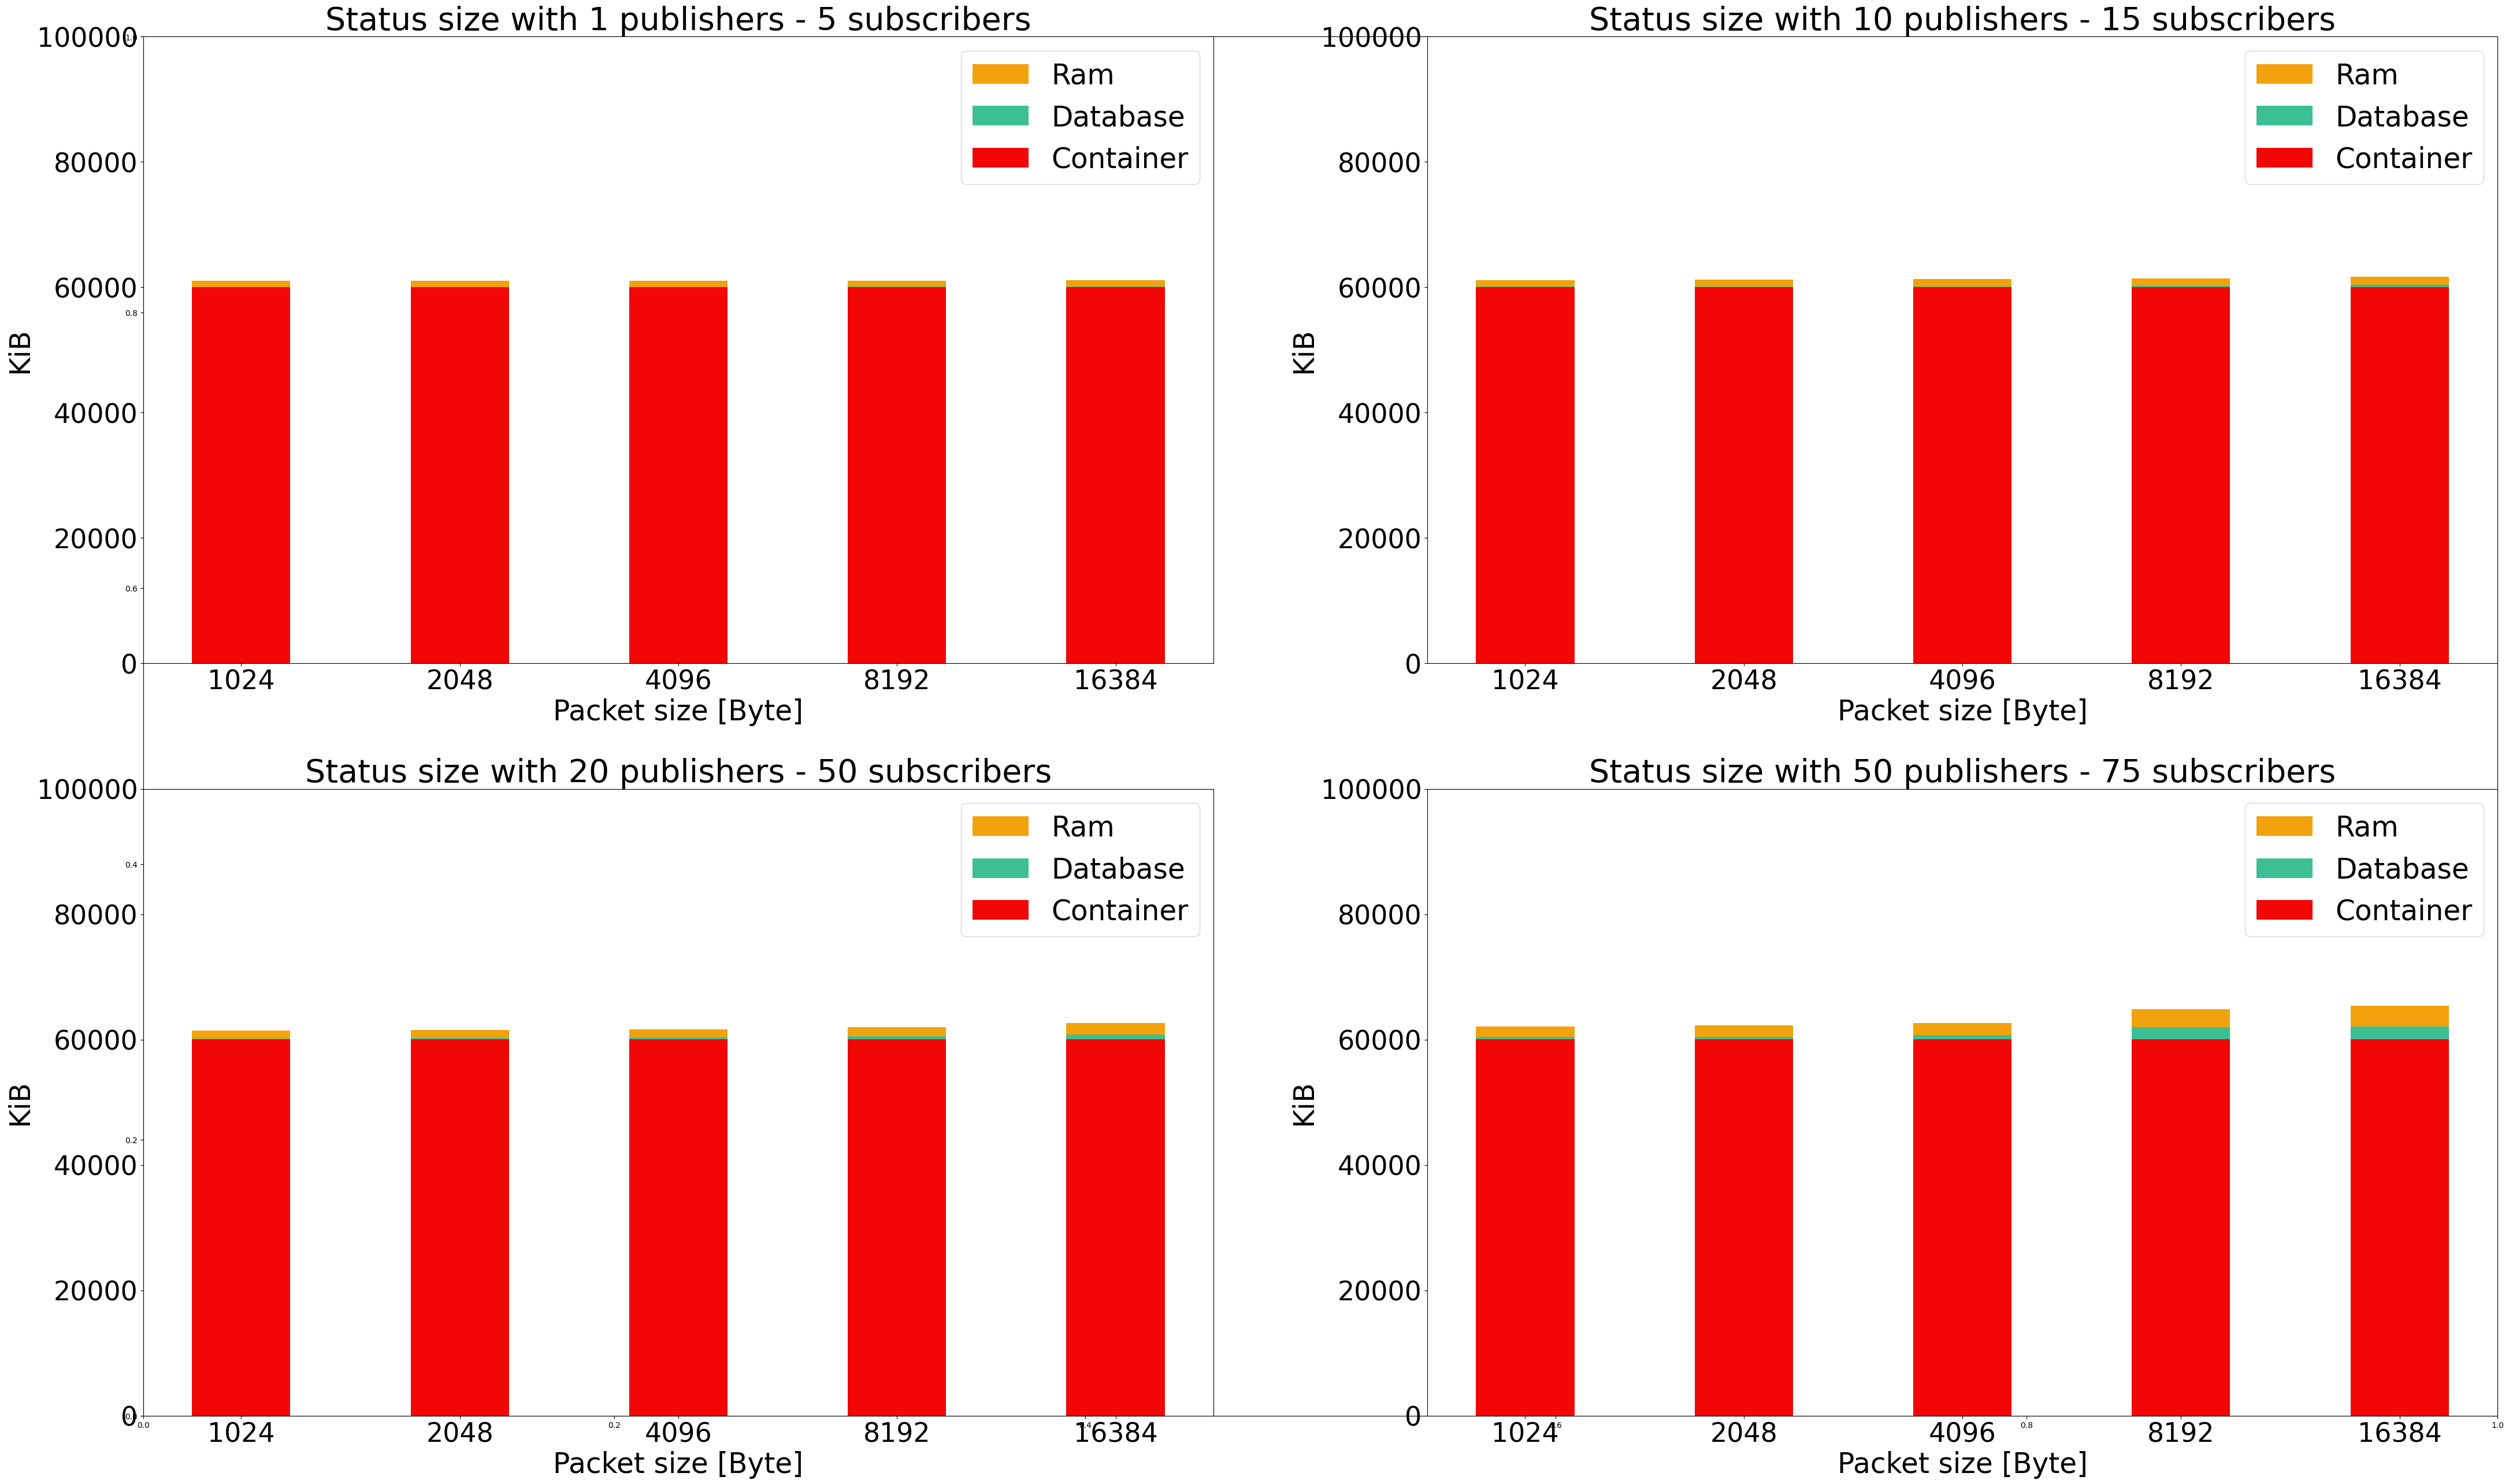

In [46]:
# make labels 10240  5120  102400  2048  52100
labels = ['1024', '2048', '4096', '8192', '16384' ]
#label_y = ram_avg_new.max()/1024 + ls_avg_new.max() + np.max(container) + 1000
label_y = 100000
clients_distribution = [(1,5), (10,15), (20,50), (50,75)]
fig, ax = plt.subplots(figsize=(37,20)); fig.tight_layout(pad=-15)
for i in range(0,4):
    plot_stacked(i+1, ram_avg_new[i], ls_avg_new[i]/1024, container, clients_distribution[i][0], clients_distribution[i][1], labels, max_y=label_y)
plt.show()